In [ ]:
#🔹 1. Import ไลบรารีที่จำเป็น
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
# 🔹 2. อ่านไฟล์ CSV และแสดงข้อมูลเบื้องต้นของอากาศ (Air Quality)
file_path_air = "../RawData/central,-singapore-air-quality.csv"
df_air = pd.read_csv(file_path_air)

print("🔍 ตัวอย่างข้อมูลจากไฟล์ Air Quality CSV")
print(df_air.head())
print(df_air.info())
print(df_air.isnull().sum())  # ดูว่ามีค่า NaN กี่ตัว

🔍 ตัวอย่างข้อมูลจากไฟล์ Air Quality CSV
       date  pm25  pm10   o3  no2  so2  co  psi
0  2025/3/1    41    29   10         2   4     
1  2025/3/2    40    25   27         2   4     
2  2025/3/3    49    28   22         2   5     
3  2025/3/4    44    29   13         2   6     
4  2025/3/5    57    25   10         3   3     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4091 non-null   object
 1    pm25   4091 non-null   object
 2    pm10   4091 non-null   object
 3    o3     4091 non-null   object
 4    no2    4091 non-null   object
 5    so2    4091 non-null   object
 6    co     4091 non-null   object
 7    psi    4091 non-null   object
dtypes: object(8)
memory usage: 255.8+ KB
None
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
 psi     0
dtype: int64


In [ ]:
# 🔹 3. แปลงคอลัมน์ date เป็น datetime
df_air["date"] = pd.to_datetime(df_air["date"], format="%Y/%m/%d", errors="coerce")
print(df_air.dtypes)  # ต้องเห็นว่า date เป็น datetime64[ns]
print("\n📅 ช่วงเวลาของข้อมูลใน Air Quality:")
print(f"เริ่มต้น: {df_air['date'].min()} → สิ้นสุด: {df_air['date'].max()}")

date     datetime64[ns]
 pm25            object
 pm10            object
 o3              object
 no2             object
 so2             object
 co              object
 psi             object
dtype: object

📅 ช่วงเวลาของข้อมูลใน Air Quality:
เริ่มต้น: 2013-12-31 00:00:00 → สิ้นสุด: 2025-03-23 00:00:00


In [ ]:
# 🔹 4. กรองข้อมูลเฉพาะช่วงปี 2015 - 2018 สำหรับ Air Quality
df_air_filtered = df_air[(df_air["date"].dt.year >= 2015) & (df_air["date"].dt.year <= 2018)]
print("\n📆 ตัวอย่างข้อมูล Air Quality หลังกรอง (2015-2018):")
print(df_air_filtered.head())
print(f"ช่วงเวลา: {df_air_filtered['date'].min()} → {df_air_filtered['date'].max()}")


📆 ตัวอย่างข้อมูล Air Quality หลังกรอง (2015-2018):
           date  pm25  pm10   o3  no2  so2  co  psi
2268 2018-10-01    66    37   27         4   4     
2269 2018-10-02    63    43   19         4   6     
2270 2018-10-03    85    40   24         4   5     
2271 2018-10-04    63    39   26         5   5     
2272 2018-10-05    68    39   18         4   5     
ช่วงเวลา: 2015-01-01 00:00:00 → 2018-12-31 00:00:00


In [ ]:
# 🔹 5. แปลงค่าคอลัมน์ตัวเลขจาก object เป็น float ใน Air Quality
df_air_filtered.columns = df_air_filtered.columns.str.strip()  # ลบช่องว่างออกจากชื่อคอลัมน์
cols = ["pm25", "pm10", "o3", "no2", "so2", "co", "psi"]
df_air_filtered[cols] = df_air_filtered[cols].apply(pd.to_numeric, errors="coerce")
print("\n📌 ประเภทข้อมูลใน Air Quality หลังแปลง:")
print(df_air_filtered.dtypes)


📌 ประเภทข้อมูลใน Air Quality หลังแปลง:
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
psi            float64
dtype: object


<ipython-input-5-748e45da9c99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_filtered[cols] = df_air_filtered[cols].apply(pd.to_numeric, errors="coerce")


In [ ]:
# 🔹 6. อ่านไฟล์ CSV และแสดงข้อมูลเบื้องต้นของสภาพอากาศ 
file_path_Central = "../RawData/Singapore Weather Central 2015-2018.csv"
df_Central = pd.read_csv(file_path_Central)

print("🔍 ตัวอย่างข้อมูลจากไฟล์ Singapore Weather Central 2015-2018")
print(df_Central.head())

🔍 ตัวอย่างข้อมูลจากไฟล์ Singapore Weather Central 2015-2018
   Year  Month  Day  Temperature (Max)  Temperature (Avg)  Temperature (Min)  \
0  2015      1    1                 82               80.1                 77   
1  2015      1    2                 86               81.6                 77   
2  2015      1    3                 88               82.6                 77   
3  2015      1    4                 90               83.6                 77   
4  2015      1    5                 91               83.9                 79   

   Dew Point (Max)\t  Dew Point (Avg)  Dew Point (Min)  Humidity (Max)  \
0                 75             72.5               72              94   
1                 73             71.0               68              89   
2                 75             71.4               70              83   
3                 72             71.0               70              83   
4                 73             70.7               66              74   

   Humidity (A

In [ ]:
# 🔹 7. ลบคอลัมน์ Unnamed: 0 ถ้ามี
df_Central = df_Central.drop(columns=["Unnamed: 0"], errors="ignore")
print(df_Central.head())

   Year  Month  Day  Temperature (Max)  Temperature (Avg)  Temperature (Min)  \
0  2015      1    1                 82               80.1                 77   
1  2015      1    2                 86               81.6                 77   
2  2015      1    3                 88               82.6                 77   
3  2015      1    4                 90               83.6                 77   
4  2015      1    5                 91               83.9                 79   

   Dew Point (Max)\t  Dew Point (Avg)  Dew Point (Min)  Humidity (Max)  \
0                 75             72.5               72              94   
1                 73             71.0               68              89   
2                 75             71.4               70              83   
3                 72             71.0               70              83   
4                 73             70.7               66              74   

   Humidity (Avg)  Humidity (Min)  Wind Speed  (Max)  Wind Speed  (Avg)  \

In [ ]:
# 🔹 8. ตรวจสอบชื่อคอลัมน์
print("\n📌 ชื่อคอลัมน์ใน Singapore Weather Central 2015-2018:")
print(df_Central.columns)
print(df_Central.dtypes)


📌 ชื่อคอลัมน์ใน Singapore Weather Central 2015-2018:
Index(['Year', 'Month', 'Day', 'Temperature (Max)', 'Temperature (Avg)',
       'Temperature (Min)', 'Dew Point (Max)\t', 'Dew Point (Avg)',
       'Dew Point (Min)', 'Humidity (Max)', 'Humidity (Avg)', 'Humidity (Min)',
       'Wind Speed  (Max)', 'Wind Speed  (Avg)', 'Wind Speed  (Min)',
       'Pressure (Max)', 'Pressure (Avg)', 'Pressure (Min)',
       'Precipitation(Total)'],
      dtype='object')
Year                      int64
Month                     int64
Day                       int64
Temperature (Max)         int64
Temperature (Avg)       float64
Temperature (Min)         int64
Dew Point (Max)\t         int64
Dew Point (Avg)         float64
Dew Point (Min)           int64
Humidity (Max)            int64
Humidity (Avg)          float64
Humidity (Min)            int64
Wind Speed  (Max)         int64
Wind Speed  (Avg)       float64
Wind Speed  (Min)         int64
Pressure (Max)          float64
Pressure (Avg)          floa

In [ ]:
# 🔹 แปลงข้อมูลแต่ละคอลัมน์ให้เหมาะสม
# สร้างคอลัมน์ 'Date' โดยการรวม Year, Month, Day
df_Central['Date'] = pd.to_datetime(df_Central[['Year', 'Month', 'Day']])

In [ ]:
# 🔹 แปลงข้อมูลแต่ละคอลัมน์ให้เหมาะสม
# สร้างคอลัมน์ 'Date' โดยการรวม Year, Month, Day
df_Central['Date'] = pd.to_datetime(df_Central[['Year', 'Month', 'Day']])

# แปลงคอลัมน์ที่เป็น int64 ให้เป็น float64
df_Central['Temperature (Max)'] = df_Central['Temperature (Max)'].astype(float)
df_Central['Temperature (Avg)'] = df_Central['Temperature (Avg)'].astype(float)
df_Central['Temperature (Min)'] = df_Central['Temperature (Min)'].astype(float)

df_Central['Dew Point (Max)\t'] = df_Central['Dew Point (Max)\t'].astype(float)
df_Central['Dew Point (Avg)'] = df_Central['Dew Point (Avg)'].astype(float)
df_Central['Dew Point (Min)'] = df_Central['Dew Point (Min)'].astype(float)

df_Central['Humidity (Max)'] = df_Central['Humidity (Max)'].astype(float)
df_Central['Humidity (Avg)'] = df_Central['Humidity (Avg)'].astype(float)
df_Central['Humidity (Min)'] = df_Central['Humidity (Min)'].astype(float)

df_Central['Wind Speed  (Max)'] = df_Central['Wind Speed  (Max)'].astype(float)
df_Central['Wind Speed  (Avg)'] = df_Central['Wind Speed  (Avg)'].astype(float)
df_Central['Wind Speed  (Min)'] = df_Central['Wind Speed  (Min)'].astype(float)

df_Central['Pressure (Max)'] = df_Central['Pressure (Max)'].astype(float)
df_Central['Pressure (Avg)'] = df_Central['Pressure (Avg)'].astype(float)
df_Central['Pressure (Min)'] = df_Central['Pressure (Min)'].astype(float)

df_Central['Precipitation(Total)'] = df_Central['Precipitation(Total)'].astype(float)

print(df_Central.dtypes)

Year                             int64
Month                            int64
Day                              int64
Temperature (Max)              float64
Temperature (Avg)              float64
Temperature (Min)              float64
Dew Point (Max)\t              float64
Dew Point (Avg)                float64
Dew Point (Min)                float64
Humidity (Max)                 float64
Humidity (Avg)                 float64
Humidity (Min)                 float64
Wind Speed  (Max)              float64
Wind Speed  (Avg)              float64
Wind Speed  (Min)              float64
Pressure (Max)                 float64
Pressure (Avg)                 float64
Pressure (Min)                 float64
Precipitation(Total)           float64
Date                    datetime64[ns]
dtype: object


In [ ]:
#🔹 1. ตรวจสอบและจัดการค่าที่หายไป (Missing Data)
print("\n📌 ค่า NaN ใน Air Quality (กรองแล้ว):")
print(df_air_filtered.isnull().sum())

print("\n📌 ค่า NaN ใน Ang Mo Kio (กรองแล้ว):")
print(df_Central.isnull().sum())


📌 ค่า NaN ใน Air Quality (กรองแล้ว):
date      0
pm25     27
pm10      9
o3        9
no2     284
so2      52
co       47
psi     761
dtype: int64

📌 ค่า NaN ใน Ang Mo Kio (กรองแล้ว):
Year                    0
Month                   0
Day                     0
Temperature (Max)       0
Temperature (Avg)       0
Temperature (Min)       0
Dew Point (Max)\t       0
Dew Point (Avg)         0
Dew Point (Min)         0
Humidity (Max)          0
Humidity (Avg)          0
Humidity (Min)          0
Wind Speed  (Max)       0
Wind Speed  (Avg)       0
Wind Speed  (Min)       0
Pressure (Max)          0
Pressure (Avg)          0
Pressure (Min)          0
Precipitation(Total)    0
Date                    0
dtype: int64


In [ ]:
# 🛠 วิธีจัดการค่า NaN: เติมค่า NaN ด้วยค่าเฉลี่ยของแต่ละคอลัมน์ที่เป็นตัวเลข
df_air_filtered.fillna(df_air_filtered.mean(numeric_only=True), inplace=True)
df_Central.fillna(df_Central.mean(numeric_only=True), inplace=True)

# ตรวจสอบผลลัพธ์หลังการเติมค่า NaN
print("\n📌 ค่า NaN หลังเติมค่าใน Air Quality:")
print(df_air_filtered.isnull().sum())

print("\n📌 ค่า NaN หลังเติมค่าใน Ang Mo Kio:")
print(df_Central.isnull().sum())


📌 ค่า NaN หลังเติมค่าใน Air Quality:
date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
psi     0
dtype: int64

📌 ค่า NaN หลังเติมค่าใน Ang Mo Kio:
Year                    0
Month                   0
Day                     0
Temperature (Max)       0
Temperature (Avg)       0
Temperature (Min)       0
Dew Point (Max)\t       0
Dew Point (Avg)         0
Dew Point (Min)         0
Humidity (Max)          0
Humidity (Avg)          0
Humidity (Min)          0
Wind Speed  (Max)       0
Wind Speed  (Avg)       0
Wind Speed  (Min)       0
Pressure (Max)          0
Pressure (Avg)          0
Pressure (Min)          0
Precipitation(Total)    0
Date                    0
dtype: int64


<ipython-input-12-444866406fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_filtered.fillna(df_air_filtered.mean(numeric_only=True), inplace=True)


In [ ]:
#🔹 2. รวมข้อมูลจากทั้งสองชุด (Merge Dataset)
# ตรวจสอบว่า df_Central มีคอลัมน์ Date และ df_air_filtered มีคอลัมน์ date เป็น datetime แล้ว
print(df_Central['Date'].dtype)
print(df_air_filtered['date'].dtype)

# รวมข้อมูลโดยใช้คอลัมน์วันที่ (Date)
df_merged = pd.merge(df_Central, df_air_filtered, left_on='Date', right_on='date', how='inner')

# แสดงข้อมูลหลังรวม
print("\n📊 ข้อมูลหลังรวม df_Central และ df_air_filtered:")
print(df_merged.head())
print(f"ช่วงเวลา: {df_merged['Date'].min()} → {df_merged['Date'].max()}")

print(df_merged.dtypes)

datetime64[ns]
datetime64[ns]

📊 ข้อมูลหลังรวม df_Central และ df_air_filtered:
   Year  Month  Day  Temperature (Max)  Temperature (Avg)  Temperature (Min)  \
0  2015      1    1               82.0               80.1               77.0   
1  2015      1    2               86.0               81.6               77.0   
2  2015      1    3               88.0               82.6               77.0   
3  2015      1    4               90.0               83.6               77.0   
4  2015      1    5               91.0               83.9               79.0   

   Dew Point (Max)\t  Dew Point (Avg)  Dew Point (Min)  Humidity (Max)  ...  \
0               75.0             72.5             72.0            94.0  ...   
1               73.0             71.0             68.0            89.0  ...   
2               75.0             71.4             70.0            83.0  ...   
3               72.0             71.0             70.0            83.0  ...   
4               73.0             70.7        

In [ ]:
# ลบคอลัมน์ที่ไม่ต้องการ
cols_to_drop = ['Temperature (Max)', 'Temperature (Min)', 'Dew Point (Max)\t', 'Dew Point (Min)',
                'Humidity (Max)', 'Humidity (Min)', 'Wind Speed  (Max)', 'Wind Speed  (Min)',
                'Pressure (Max)', 'Pressure (Min)', 'Year', 'Month', 'Day', 'date']

# ลบคอลัมน์ที่ระบุ
df_merged = df_merged.drop(columns=cols_to_drop, errors="ignore")

# แสดงข้อมูลหลังจากลบคอลัมน์
print("\n📊 ข้อมูลหลังจากลบคอลัมน์ที่ไม่ต้องการ:")
print(df_merged.head())
print(df_merged.dtypes)


📊 ข้อมูลหลังจากลบคอลัมน์ที่ไม่ต้องการ:
   Temperature (Avg)  Dew Point (Avg)  Humidity (Avg)  Wind Speed  (Avg)  \
0               80.1             72.5            78.0                6.4   
1               81.6             71.0            70.8               11.8   
2               82.6             71.4            69.2                8.1   
3               83.6             71.0            65.6                7.7   
4               83.9             70.7            65.0                6.7   

   Pressure (Avg)  Precipitation(Total)       Date  pm25  pm10    o3   no2  \
0            29.8                   0.0 2015-01-01  55.0  25.0  26.0  14.0   
1            29.8                   0.0 2015-01-02  48.0  30.0  25.0   8.0   
2            29.8                   0.0 2015-01-03  48.0  20.0  27.0   7.0   
3            29.8                   0.0 2015-01-04  37.0  14.0  25.0  11.0   
4            29.8                   0.0 2015-01-05  35.0  18.0  20.0  11.0   

   so2   co        psi  
0  2.0  1

In [ ]:
# จัดเรียงคอลัมน์ใน DataFrame 
ordered_columns = [
    'Date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'psi',
    'Temperature (Avg)', 'Dew Point (Avg)', 'Humidity (Avg)', 
    'Wind Speed  (Avg)', 'Pressure (Avg)', 'Precipitation(Total)'
]

# จัดเรียงคอลัมน์ใน DataFrame
df_merged = df_merged[ordered_columns]

# แสดงข้อมูลหลังจากจัดเรียงคอลัมน์
print("\n📊 ข้อมูลหลังจากจัดเรียงคอลัมน์:")
print(df_merged.head())
print(df_merged.dtypes)


📊 ข้อมูลหลังจากจัดเรียงคอลัมน์:
        Date  pm25  pm10    o3   no2  so2   co        psi  Temperature (Avg)  \
0 2015-01-01  55.0  25.0  26.0  14.0  2.0  1.0  56.061871               80.1   
1 2015-01-02  48.0  30.0  25.0   8.0  2.0  2.0  55.000000               81.6   
2 2015-01-03  48.0  20.0  27.0   7.0  1.0  2.0  40.000000               82.6   
3 2015-01-04  37.0  14.0  25.0  11.0  2.0  2.0  38.000000               83.6   
4 2015-01-05  35.0  18.0  20.0  11.0  3.0  3.0  42.000000               83.9   

   Dew Point (Avg)  Humidity (Avg)  Wind Speed  (Avg)  Pressure (Avg)  \
0             72.5            78.0                6.4            29.8   
1             71.0            70.8               11.8            29.8   
2             71.4            69.2                8.1            29.8   
3             71.0            65.6                7.7            29.8   
4             70.7            65.0                6.7            29.8   

   Precipitation(Total)  
0                   0

In [ ]:
#🔹 3. ตรวจสอบค่าซ้ำ (Duplicate Data)
print("\n📌 จำนวนแถวข้อมูลที่ซ้ำ:")
duplicates = df_merged.duplicated().sum()
print(duplicates)
if duplicates > 0:
    df_merged = df_merged.drop_duplicates()
    print("📌 ลบแถวข้อมูลที่ซ้ำแล้ว")


📌 จำนวนแถวข้อมูลที่ซ้ำ:
0


In [ ]:
#🔹 4. ตรวจสอบค่าหายไปใน df_merged
print("\n📌 ค่า NaN ใน df_merged:")
print(df_merged.isnull().sum())


📌 ค่า NaN ใน df_merged:
Date                    0
pm25                    0
pm10                    0
o3                      0
no2                     0
so2                     0
co                      0
psi                     0
Temperature (Avg)       0
Dew Point (Avg)         0
Humidity (Avg)          0
Wind Speed  (Avg)       0
Pressure (Avg)          0
Precipitation(Total)    0
dtype: int64


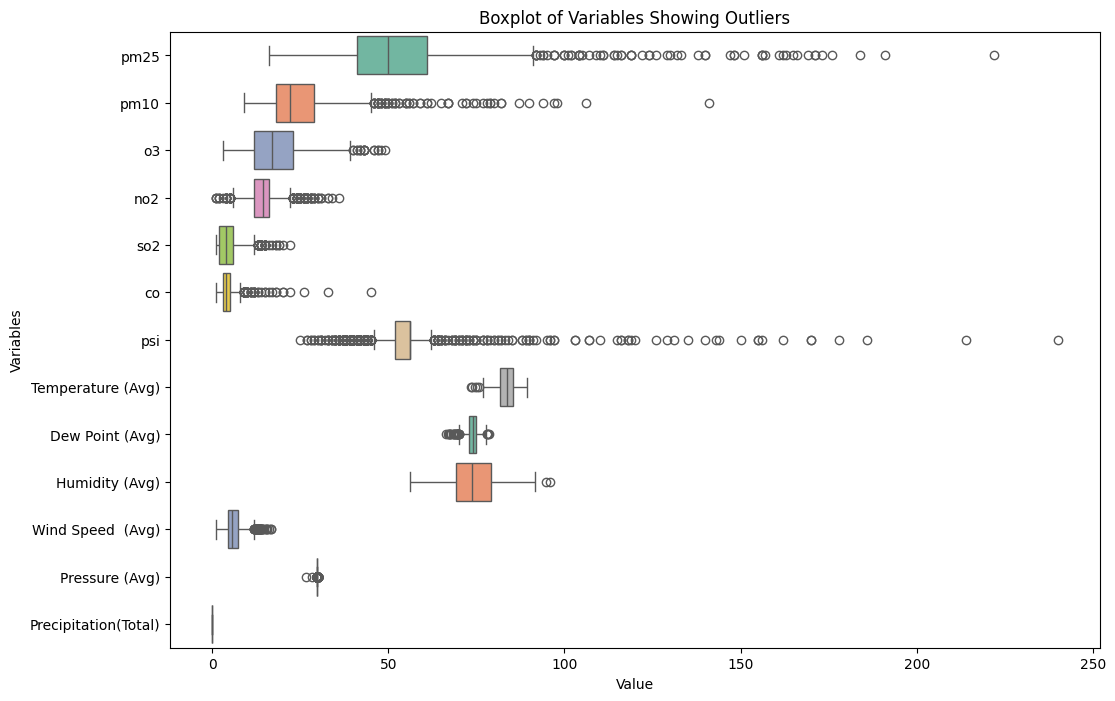

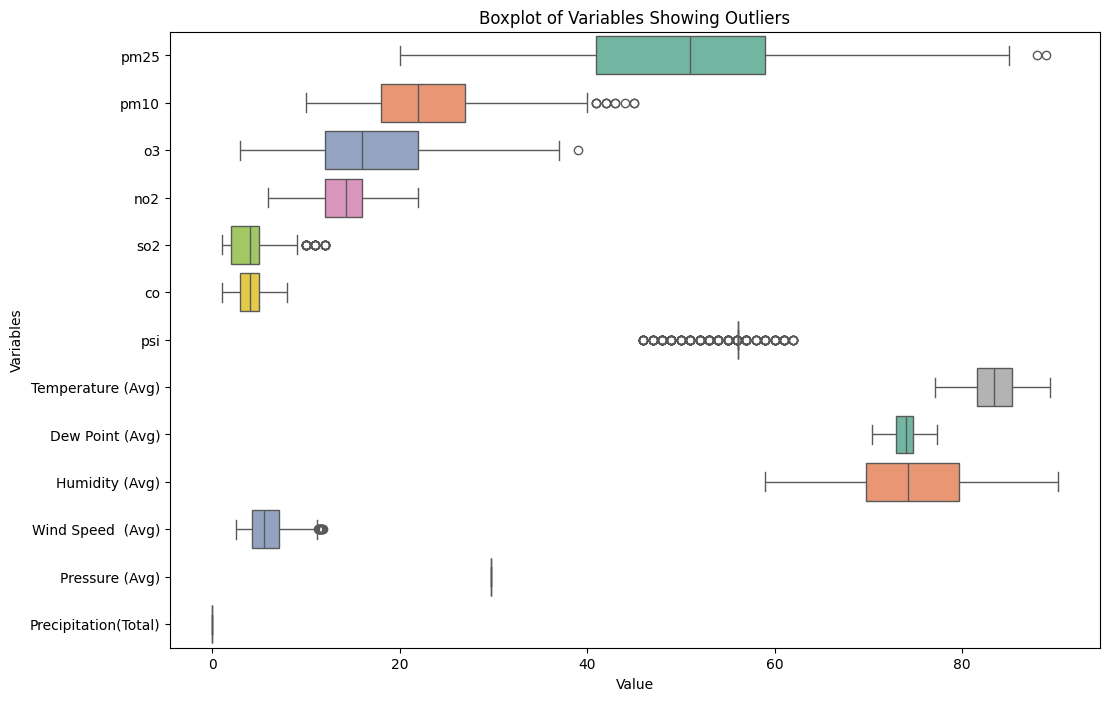

In [ ]:
# 🔹 5. ตรวจสอบค่าผิดปกติ (Outliers) ด้วย IQR
# การตรวจสอบค่าผิดปกติด้วย IQR (Interquartile Range)
Q1 = df_merged.quantile(0.25)
Q3 = df_merged.quantile(0.75)
IQR = Q3 - Q1

# วาดกราฟ boxplot เพื่อแสดงค่าผิดปกติ
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_merged, orient="h", palette="Set2")
plt.title("Boxplot of Variables Showing Outliers")
plt.xlabel("Value")
plt.ylabel("Variables")
plt.show()

df_merged = df_merged[~((df_merged < (Q1 - 1.5 * IQR)) | (df_merged > (Q3 + 1.5 * IQR))).any(axis=1)]
# วาดกราฟ boxplot เพื่อแสดงค่าผิดปกติ
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_merged, orient="h", palette="Set2")
plt.title("Boxplot of Variables Showing Outliers")
plt.xlabel("Value")
plt.ylabel("Variables")
plt.show()


📌 ความสัมพันธ์ระหว่างตัวแปร:
                          Date      pm25      pm10        o3       no2  \
Date                  1.000000  0.050599  0.307168 -0.011989  0.020931   
pm25                  0.050599  1.000000  0.669889  0.284423  0.163816   
pm10                  0.307168  0.669889  1.000000  0.232577  0.114060   
o3                   -0.011989  0.284423  0.232577  1.000000  0.045882   
no2                   0.020931  0.163816  0.114060  0.045882  1.000000   
so2                   0.025359  0.076651 -0.019637 -0.135255  0.260796   
co                    0.252565  0.039699  0.087920  0.021502  0.188208   
psi                   0.366268  0.168572  0.254376  0.205469  0.119797   
Temperature (Avg)    -0.334708  0.159216  0.052816  0.081883 -0.073835   
Dew Point (Avg)       0.027506 -0.012829 -0.167208 -0.197311  0.176421   
Humidity (Avg)        0.313885 -0.138254 -0.123734 -0.157869  0.152974   
Wind Speed  (Avg)    -0.277351 -0.058773 -0.024421  0.089809 -0.392870   
Pressure

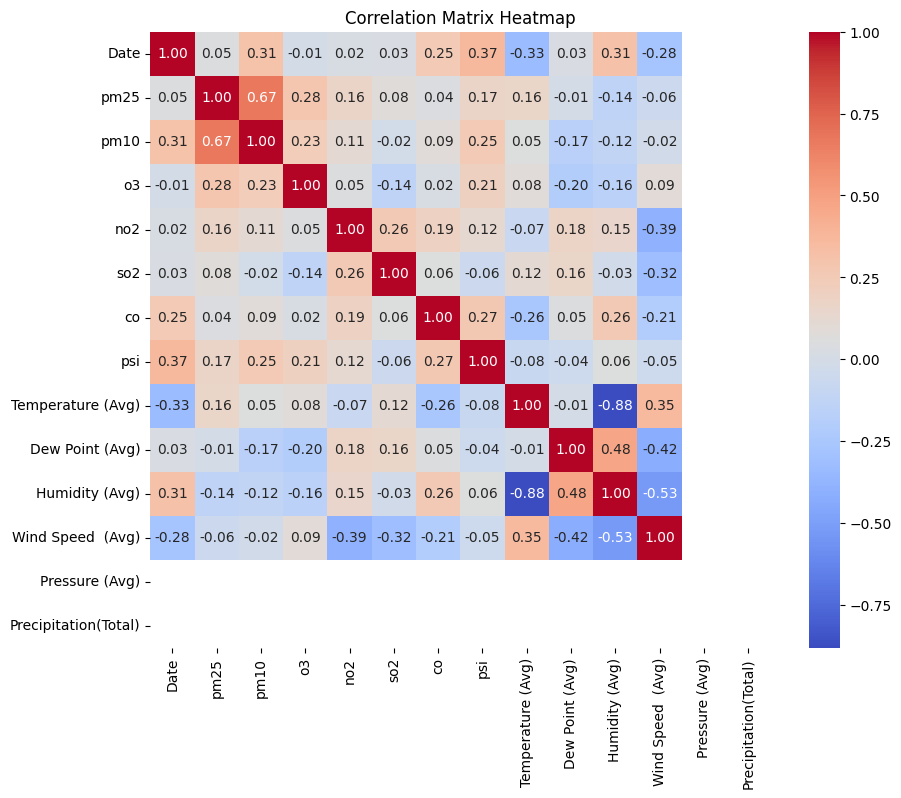

In [ ]:
# 🔹 6. ตรวจสอบความสัมพันธ์ของตัวแปร (Correlation)
correlation_matrix = df_merged.corr()
print("\n📌 ความสัมพันธ์ระหว่างตัวแปร:")
print(correlation_matrix)

# วาดกราฟ heatmap ของ correlation matrix เพื่อให้ดูภาพรวมความสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# 🔹 คำนวณ PSI อย่างง่ายโดยใช้ค่ามลพิษที่มากที่สุดในแต่ละแถว
df_merged['PSI_Calculated'] = df_merged[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

# 🔹 สร้าง DataFrame สำหรับเปรียบเทียบ
comparison_df = df_merged[['Date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'psi', 'PSI_Calculated']].copy()

# 🔹 เพิ่มสถานะว่าค่าตรงกันหรือไม่
comparison_df['Match'] = np.where(comparison_df['psi'].round() == comparison_df['PSI_Calculated'].round(), '✅ Match', '❌ Not Match')

# 🔹 เพิ่มคอลัมน์แสดงความแตกต่างของค่า PSI
comparison_df['Difference'] = (comparison_df['psi'] - comparison_df['PSI_Calculated']).round(2)

# 🔹 แสดงตารางตัวอย่าง (เฉพาะค่าที่ไม่ตรงกัน)
mismatch_df = comparison_df[comparison_df['Match'] == '❌ Not Match']
print("\n📊 ตารางค่าที่ไม่ตรงกัน พร้อมแสดงความต่าง:")
print(mismatch_df[['Date', 'psi', 'PSI_Calculated', 'Difference', 'Match']].head(10))

# 🔹 สรุปจำนวนรายการที่ไม่ตรงกันทั้งหมด
total_rows = comparison_df.shape[0]
total_mismatches = mismatch_df.shape[0]
print(f"\n🔴 พบทั้งหมด {total_mismatches} แถวที่ค่า PSI ไม่ตรงกับค่าที่คำนวณได้ จากทั้งหมด {total_rows} แถว")
print(f"📌 คิดเป็น {total_mismatches / total_rows * 100:.2f}% ของข้อมูลทั้งหมด")


📊 ตารางค่าที่ไม่ตรงกัน พร้อมแสดงความต่าง:
         Date        psi  PSI_Calculated  Difference        Match
0  2015-01-01  56.061871            55.0        1.06  ❌ Not Match
1  2015-01-02  55.000000            48.0        7.00  ❌ Not Match
26 2015-01-27  51.000000            62.0      -11.00  ❌ Not Match
44 2015-02-14  60.000000            59.0        1.00  ❌ Not Match
45 2015-02-15  57.000000            59.0       -2.00  ❌ Not Match
50 2015-02-20  47.000000            39.0        8.00  ❌ Not Match
53 2015-02-23  49.000000            38.0       11.00  ❌ Not Match
55 2015-02-25  50.000000            49.0        1.00  ❌ Not Match
56 2015-02-26  51.000000            48.0        3.00  ❌ Not Match
59 2015-03-01  46.000000            39.0        7.00  ❌ Not Match

🔴 พบทั้งหมด 671 แถวที่ค่า PSI ไม่ตรงกับค่าที่คำนวณได้ จากทั้งหมด 682 แถว
📌 คิดเป็น 98.39% ของข้อมูลทั้งหมด


In [ ]:
# 🔹 แทนที่ค่า PSI เดิมด้วยค่าที่คำนวณได้
df_merged['psi'] = df_merged['PSI_Calculated']

# 🔹 เปรียบเทียบค่า PSI ที่ถูกแทนที่
comparison_df['psi'] = df_merged['psi']  # อัปเดตค่า psi ใน comparison_df
comparison_df['Match'] = np.where(comparison_df['psi'].round() == comparison_df['PSI_Calculated'].round(), '✅ Match', '❌ Not Match')
comparison_df['Difference'] = (comparison_df['psi'] - comparison_df['PSI_Calculated']).round(2)

# 🔹 แสดงตารางค่าที่ไม่ตรงกันหลังจากการแทนที่
mismatch_df = comparison_df[comparison_df['Match'] == '❌ Not Match']
print("\n📊 ตารางค่าที่ไม่ตรงกัน พร้อมแสดงความต่าง (หลังจากการแทนที่):")
print(mismatch_df[['Date', 'psi', 'PSI_Calculated', 'Difference', 'Match']].head(10))

# 🔹 สรุปจำนวนรายการที่ไม่ตรงกันทั้งหมดหลังการแทนที่
total_rows = comparison_df.shape[0]
total_mismatches = mismatch_df.shape[0]
print(f"\n🔴 พบทั้งหมด {total_mismatches} แถวที่ค่า PSI ไม่ตรงกับค่าที่คำนวณได้ จากทั้งหมด {total_rows} แถว")
print(f"📌 คิดเป็น {total_mismatches / total_rows * 100:.2f}% ของข้อมูลทั้งหมด")

# 🔹 ลบคอลัมน์ PSI_Calculated
df_merged = df_merged.drop(columns=['PSI_Calculated'], errors='ignore')


📊 ตารางค่าที่ไม่ตรงกัน พร้อมแสดงความต่าง (หลังจากการแทนที่):
Empty DataFrame
Columns: [Date, psi, PSI_Calculated, Difference, Match]
Index: []

🔴 พบทั้งหมด 0 แถวที่ค่า PSI ไม่ตรงกับค่าที่คำนวณได้ จากทั้งหมด 682 แถว
📌 คิดเป็น 0.00% ของข้อมูลทั้งหมด


In [ ]:
# แสดงรายละเอียดของข้อมูล df_merged
# 🔹 1. แสดงชื่อคอลัมน์ทั้งหมดในชุดข้อมูล
print("📌 คอลัมน์ทั้งหมดในชุดข้อมูล:")
print(df_merged.columns)

📌 คอลัมน์ทั้งหมดในชุดข้อมูล:
Index(['Date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'psi',
       'Temperature (Avg)', 'Dew Point (Avg)', 'Humidity (Avg)',
       'Wind Speed  (Avg)', 'Pressure (Avg)', 'Precipitation(Total)'],
      dtype='object')


In [ ]:
# 🔹 2. แสดงช่วงเวลาของข้อมูล
print("\n📅 ช่วงเวลาของข้อมูล:")
print(f"เริ่มต้น: {df_merged['Date'].min()} → สิ้นสุด: {df_merged['Date'].max()}")


📅 ช่วงเวลาของข้อมูล:
เริ่มต้น: 2015-01-01 00:00:00 → สิ้นสุด: 2018-12-31 00:00:00


In [ ]:
# 🔹 3. แสดงความถี่ของข้อมูลในแต่ละเดือน แยกตามปี
df_merged['Year'] = df_merged['Date'].dt.year  # ดึงข้อมูลปี
df_merged['Month'] = df_merged['Date'].dt.month  # ดึงข้อมูลเดือน

monthly_counts_by_year = df_merged.groupby(['Year', 'Month']).size().unstack()

print("\n📊 ความถี่ของข้อมูลในแต่ละเดือน แยกตามปี:")
print(monthly_counts_by_year)


📊 ความถี่ของข้อมูลในแต่ละเดือน แยกตามปี:
Month    1     2     3     4     5     6     7     8     9     10    11    12
Year                                                                         
2015    3.0   7.0  12.0  16.0  16.0  13.0  11.0  15.0   NaN   3.0   8.0  12.0
2016    5.0   2.0  16.0  15.0   6.0  15.0  15.0  10.0  15.0  13.0   6.0  16.0
2017   15.0  17.0  18.0  12.0   8.0  24.0  29.0  18.0  23.0  13.0   3.0  19.0
2018    9.0  14.0  17.0  15.0  18.0  22.0  19.0  20.0  24.0  26.0  24.0  25.0


In [ ]:
# 🔹 4. แสดงข้อมูลสถิติ
print("\n📈 ข้อมูลสถิติของชุดข้อมูล:")
print(df_merged.describe())


📈 ข้อมูลสถิติของชุดข้อมูล:
                                Date        pm25        pm10          o3  \
count                            682  682.000000  682.000000  682.000000   
mean   2017-05-01 04:51:22.697947136   50.793661   23.414372   17.325042   
min              2015-01-01 00:00:00   20.000000   10.000000    3.000000   
25%              2016-06-22 12:00:00   41.000000   18.000000   12.000000   
50%              2017-06-27 12:00:00   51.000000   22.000000   16.000000   
75%              2018-05-08 18:00:00   59.000000   27.000000   22.000000   
max              2018-12-31 00:00:00   89.000000   45.000000   39.000000   
std                              NaN   12.413083    6.890837    7.218362   

              no2         so2          co         psi  Temperature (Avg)  \
count  682.000000  682.000000  682.000000  682.000000         682.000000   
mean    14.072373    4.307144    4.316025   50.803925          83.395748   
min      6.000000    1.000000    1.000000   20.000000      

In [ ]:
# 🔹 5. ตรวจสอบจำนวนข้อมูลในแต่ละปี
df_merged['Year'] = df_merged['Date'].dt.year  # ดึงข้อมูลปีออกมา
yearly_counts = df_merged['Year'].value_counts().sort_index()
print("\n📆 จำนวนข้อมูลในแต่ละปี:")
print(yearly_counts)


📆 จำนวนข้อมูลในแต่ละปี:
Year
2015    116
2016    134
2017    199
2018    233
Name: count, dtype: int64


In [ ]:
# 🔹 6. แสดงผลรวมของจำนวนข้อมูลทั้งหมดในทุกปี
total_records = yearly_counts.sum()

print("\n📊 จำนวนข้อมูลทั้งหมดในทุกปีรวมกัน:")
print(total_records)

print(df_merged.dtypes)


📊 จำนวนข้อมูลทั้งหมดในทุกปีรวมกัน:
682
Date                    datetime64[ns]
pm25                           float64
pm10                           float64
o3                             float64
no2                            float64
so2                            float64
co                             float64
psi                            float64
Temperature (Avg)              float64
Dew Point (Avg)                float64
Humidity (Avg)                 float64
Wind Speed  (Avg)              float64
Pressure (Avg)                 float64
Precipitation(Total)           float64
Year                             int32
Month                            int32
dtype: object


In [ ]:
# 🔹 ปัดค่าทศนิยมเฉพาะคอลัมน์ตัวเลขให้เหลือ 2 ตำแหน่ง
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
df_merged[numeric_cols] = df_merged[numeric_cols].round(2)

df_merged.reset_index(drop=True, inplace=True)
print("📊 ตัวอย่างข้อมูลหลังปัดค่าทศนิยม:")
print(df_merged.head(10))

📊 ตัวอย่างข้อมูลหลังปัดค่าทศนิยม:
        Date  pm25  pm10    o3   no2  so2   co   psi  Temperature (Avg)  \
0 2015-01-01  55.0  25.0  26.0  14.0  2.0  1.0  55.0               80.1   
1 2015-01-02  48.0  30.0  25.0   8.0  2.0  2.0  48.0               81.6   
2 2015-01-27  62.0  25.0  20.0  11.0  5.0  2.0  62.0               82.2   
3 2015-02-14  59.0  29.0  36.0  11.0  4.0  2.0  59.0               81.3   
4 2015-02-15  59.0  27.0  30.0  11.0  4.0  2.0  59.0               82.3   
5 2015-02-20  39.0  20.0  25.0   8.0  2.0  1.0  39.0               82.6   
6 2015-02-23  38.0  21.0  18.0  11.0  2.0  2.0  38.0               82.7   
7 2015-02-24  49.0  20.0  23.0  13.0  3.0  2.0  49.0               82.3   
8 2015-02-25  49.0  22.0  21.0  11.0  3.0  2.0  49.0               82.7   
9 2015-02-26  48.0  22.0  23.0  11.0  3.0  2.0  48.0               82.6   

   Dew Point (Avg)  Humidity (Avg)  Wind Speed  (Avg)  Pressure (Avg)  \
0             72.5            78.0                6.4            29

In [ ]:
# 🔹 บันทึกไฟล์ CSV อีกครั้ง (โดยไม่เก็บคอลัมน์ Month, Year)
df_merged = df_merged.drop(columns=['Month', 'Year'], errors='ignore')